<a href="https://colab.research.google.com/github/juanpabloceruso/Food-Delivery-Prediccion-de-Comprador-Recurrente-con-Python/blob/main/Prediccion_de_CompradorRecurrente_Delivery_de_Comidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de Delivery de Comidas  

Una empresa de delivery busca predecir, a partir de información de los consumidores y sus hábitos de consumo, si será consumidores reiterativos de su aplicación.

## Análisis Exploratorio

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "whitegrid")

data = pd.read_csv("onlinefoods.csv")
print(data.head())


   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

Vemos que el conjunto de datos contiene 13 variables, las cuales incluyen a:


*   Age: La edad del consumidor.
*   Gender: Género del consumidor.
*   Marital Status: El estado civil del consumidor.
*   Ocupation: La profesión del consumidor.
*   Monthly Income: Incluye distintas categorías de ingresos de los consumidores.
*   Educational Qualifications: Distintas Categorías, según el máximo nivel de educación alcanzado.
*   Family Size: Representa el tamaño del grupo familiar, sin tener en cuenta si son familiares directos o cohabitantes.
*   Latitude y Longitud del lugar de residencia.
*   Pin Code de la residencia del consumidor.
*   Output: una variable que devuelve "Yes" o "No" según si el afiliado volvió a comprar o no.
*   Feedback: si la última compra respondió positiva o negativamente.
*   Unnamed: 12



In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


### Análisis Univariado

Iniciamos analizando la frecuencia de recompra de los consumidores según su edad.

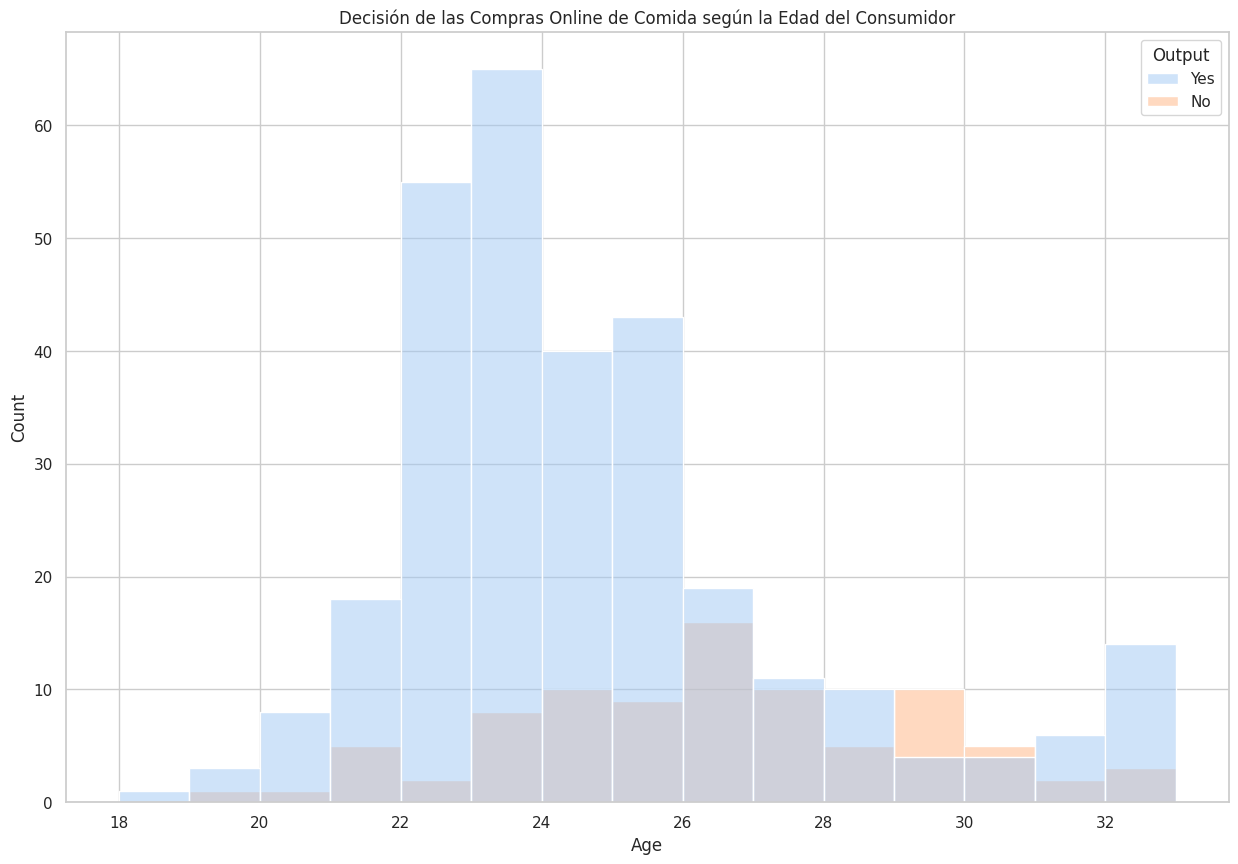

In [4]:
plt.figure(figsize=(15,10))
plt.title("Decisión de las Compras Online de Comida según la Edad del Consumidor")
sns.histplot(x= "Age", hue="Output", data=data, bins = 15, palette = "pastel")
plt.show()

Podemos ver que el grupo entre 22 y 25 años es el que realiza ordenes más frecuentemente, y también el que más marcadamente vuelve a realizar compras posteriormente.

Ahora, analicemos las decisiones en base al tamaño del grupo familiar:

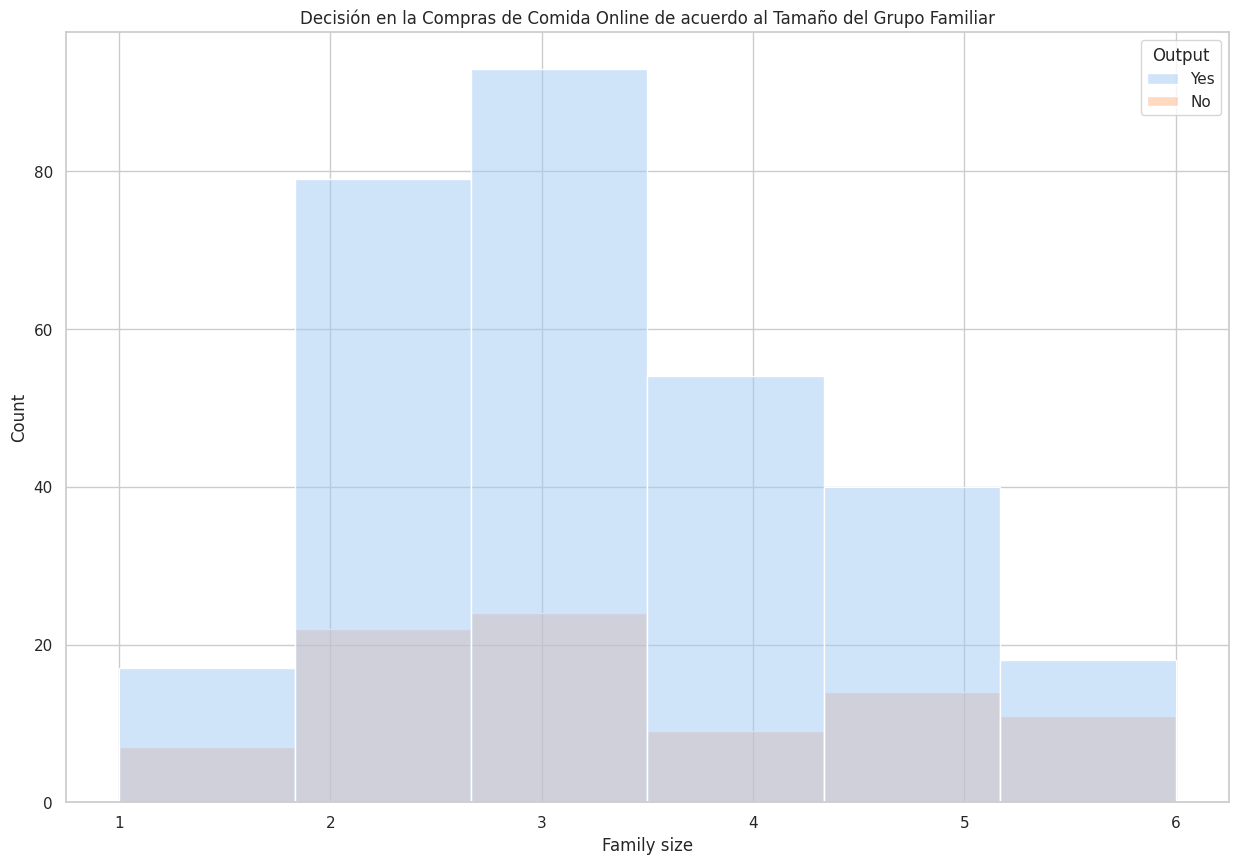

In [5]:
plt.figure(figsize=(15, 10))
plt.title("Decisión en la Compras de Comida Online de acuerdo al Tamaño del Grupo Familiar")
sns.histplot(x="Family size", hue="Output", data=data, bins = 6, palette = "pastel")
plt.show()

Vemos que los grupos de 2 y 3 personas son los que realizan ordenes con mayor frecuencia.

### Análisis del Objetivo

Procedemos a armar un subset con llos clientes que realizaron la compra nuevamente, para analizar los comportamientos que presentan;



In [6]:
buying_again_data = data.query("Output == 'Yes'")
print(buying_again_data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

A partir de este subconjunto de datos, analizamos que género tuvo una mayor participación:

In [7]:
gender = buying_again_data["Gender"].value_counts()
label = gender.index
counts = gender.values
colors = sns.color_palette("pastel")

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Quuien Realizó Más Ordenes: Masculino o Femenino')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='white', width=1)))
fig.show()

De acuerdo a este dato, podemos ver que los clientes masculinos están realizando más compras que las mujeres.

Ahora analicemos las compras de acuerdo al estado civil.

In [8]:
marital = buying_again_data["Marital Status"].value_counts()
label = marital.index
counts = marital.values
colors = sns.color_palette("pastel")

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Quien Realizó más Ordenes: Casados o Solteros')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='white', width=1)))
fig.show()

De acuerdo a este gráfico, el 76,1% de los clientes frecuentes son solteros.

Ahora analicemos las compras de acuerdo a los grupos de ingresos económicos:

In [9]:
income = buying_again_data["Monthly Income"].value_counts()
label = income.index
counts = income.values
colors = sns.color_palette("pastel")

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Which Income Group Orders Food Online More')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='white', width=1)))
fig.show()

Vemos que el 54,5% de los clientes reiterativos pertenecen al grupo sin Ingresos, los cuales pueden estar relacionados con Amas de Casa o con Estudiantes.

## Modelado de Datos

Vamos a iniciar el proceso de modelado probando convertir todas las variables categóricas a variables numéricas, mediante onehotencoding y eliminando la primer columna, luego procedemos a analizar la correlación de las mismas para ver si se debe eliminar alguna más:

     Age  Gender Marital Status Occupation  Monthly Income  \
0     20  Female         Single    Student       No Income   
1     24  Female         Single    Student  Below Rs.10000   
2     22    Male         Single    Student  Below Rs.10000   
3     22  Female         Single    Student       No Income   
4     22    Male         Single    Student  Below Rs.10000   
..   ...     ...            ...        ...             ...   
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773    560009   
2                Post

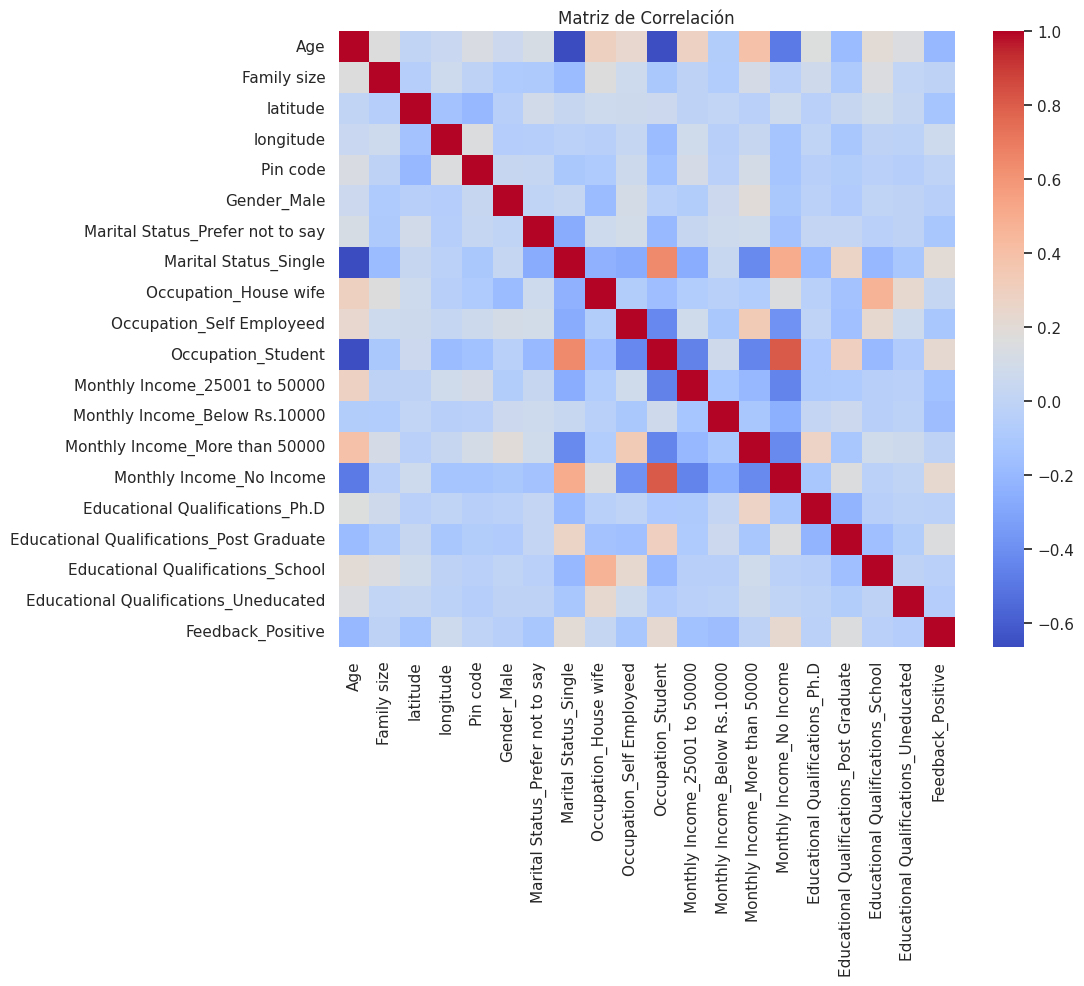

In [30]:
# Dividir los datos en características y variable objetivo
X = data.drop('Output', axis=1)
X = X.drop('Unnamed: 12', axis=1)
print(X)
X = pd.get_dummies(X, dtype = int, drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = X.corr()

# Graficar la matriz de correlación utilizando un mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación')
plt.show()


Procedemos a generar dos posibles Pipelines y quedarnos con el mejor:

In [38]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers
from scipy import sparse

# Supongamos que tienes un DataFrame llamado df con las columnas 'gender', 'monthly_income', 'Age', 'family Size', 'latitude', 'longitude' y 'pin code'

# Dividir los datos en características y variable objetivo
X = data.drop('Output', axis=1)
X = X.drop('Unnamed: 12', axis=1)
y = data['Output'].map({"Yes":1, "No":0})

# Definir columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

# Procesar datos categóricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))])

# Procesar datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Combinar procesamientos
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)])

# Definir el modelo de red neuronal
model = keras.Sequential([
    layers.Input(shape=(24,)),  # Capa de entrada
    layers.Dense(64, activation='relu'),  # Capa oculta con activación ReLU
    layers.Dense(32, activation='relu'),  # Otra capa oculta con activación ReLU
    layers.Dense(1, activation='sigmoid')  # Capa de salida con activación sigmoide para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Definir el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Entrenar el pipeline
best_model = pipeline.fit(X_train, y_train, classifier__epochs=10)

# Evaluar el modelo
accuracy = pipeline['classifier'].evaluate(pipeline['preprocessor'].transform(X_test), y_test)[1]
print("Exactitud del modelo:", accuracy)

Epoch 1/10
10/10 [==============================] - 2s 8ms/step - loss: 0.6803 - accuracy: 0.5903
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 0.5858 - accuracy: 0.7613
Epoch 3/10
10/10 [==============================] - 0s 10ms/step - loss: 0.5425 - accuracy: 0.7581
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 0.5149 - accuracy: 0.7581
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 0.4896 - accuracy: 0.7613
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.7742
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.7968
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4397 - accuracy: 0.8065
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4259 - accuracy: 0.8194
Epoch 10/10
3/3 [==============================] - 0s 7ms/step - loss: 0.3196 - accuracy: 0.9103
Exactitud del modelo

In [37]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBClassifier
from scipy import sparse

# Supongamos que tienes un DataFrame llamado df con las columnas 'gender', 'monthly_income', 'Age', 'family Size', 'latitude', 'longitude' y 'pin code'

# Dividir los datos en características y variable objetivo
X = data.drop('Output', axis=1)
X = X.drop('Unnamed: 12', axis=1)
y = data['Output'].map({"Yes":1, "No":0})

# Definir columnas categóricas y numéricas
categorical_cols = ['Gender', 'Feedback', 'Marital Status', 'Occupation', 'Educational Qualifications', 'Monthly Income']
numeric_cols = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

# Procesar datos categóricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))])

# Procesar datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Combinar procesamientos
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)])

# Definir el modelo de Gradient Boosting (XGBoost)
model = XGBClassifier()

# Definir el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])


# Definir el espacio de búsqueda de parámetros
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
    'classifier__max_depth': [3, 4, 5, 6, 7]
}

# Crear GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')


# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Calcular la exactitud del modelo con los mejores hiperparámetros
accuracy = grid_search.score(X_test, y_test)
print("Exactitud del modelo con mejores hiperparámetros:", accuracy)

Mejores hiperparámetros: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200}
Exactitud del modelo con mejores hiperparámetros: 0.8974358974358975


Como vemos el mejor proceso resultó el de la red neuronal, exportamos ese pipeline a un archivo ".pkl"

In [40]:
import joblib

# Guardar el mejor modelo en un archivo
joblib.dump(best_model, 'ModeloPredictorCompradores.pkl')

['ModeloPredictorCompradores.pkl']